# Affinity Propagation
모든 데이터가 스스로 자신의 대표를 결정(자기 자신 포함)

- responsibility $r(i,k)$
    - k 번째 데이터가 i번째 데이터의 대표가 되어야 한다는 근거

- availability $a(i,k)$
    - i 번째 데이터가 k번째 데이터의 대표를 선택해야 한다는 근거

   
- 음의 거리로 정의되는 유사도 $s(i, k)$

$$s(i,k) = -|| x_i - x_k ||^2$$

    - 사용자가 정해주게 되는데, 이 값이 커지면 자기 자신에 대한 유사도가 커짐 
    - -> 클러스터 수 증가

수렴할 때까지 반복
   
   $$r(i, k) \leftarrow s(i, k) - \max_{k' \neq k} ( a(i, k') + s(i, k'))$$
   
   $$a(i, k) \leftarrow \min(0, r(k, k) + \sum_{i' \neq i,k} r(i', k))$$
    
    

In [1]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [3]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(preference=-50).fit(X)

In [4]:
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

from sklearn import metrics

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


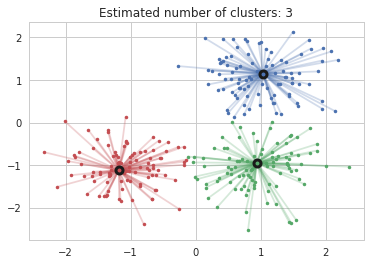

In [5]:
%matplotlib inline
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=7)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()